In [1]:
ell_idx = 42
print('ell_idx', ell_idx)

ell_idx 42


In [2]:
2**5

32

In [3]:
2**6

64

In [4]:
from LIMxCMBL.init import *
from tqdm import trange

ell_curr = ells[ell_idx]
oup_fname = '/scratch/users/delon/LIMxCMBL/dkparp_integral/ell_%.8f.npy'%(ell_curr)
print('outputting to', oup_fname)


## CHANGE HERE
chibs = np.linspace(1e-8, chimax, 100)
chibs = np.logspace(1, np.log10(chimax), 2**5) #2**5 seems good

deltas = np.logspace(-6, np.log10(1-eps), 2**6)

outputting to /scratch/users/delon/LIMxCMBL/dkparp_integral/ell_139.64248787.npy


In [5]:
_chibs, _deltas = np.meshgrid(chibs, deltas, indexing='ij')
print('oup dimension', _chibs.shape)

_chibs  = np.reshape(_chibs,  (len(chibs) * len(deltas)))
_deltas = np.reshape(_deltas, (len(chibs) * len(deltas)))

kperp2s = ell_curr**2 / (_chibs**2 * (1 - _deltas**2))

oup dimension (32, 64)


In [6]:
from scipy.integrate import quad, quad_vec
from scipy.interpolate import interp1d

for i in range(len(chibs)):
    for j in range(len(deltas)):
        assert(np.abs(kperp2s[i*len(deltas)+j] - ell_curr**2 / (chibs[i]**2 * (1 - deltas[j]**2))) < 1e-8)

In [7]:

def integrand(kparp):
    return 2/(2*np.pi) * np.cos(kparp * 2 * _chibs * _deltas) * ccl.linear_matter_power(cosmo, np.sqrt(kparp**2 + kperp2s), 1)

print('beginning quad_vec')

res, err = quad_vec(integrand, 0, np.inf,
                  epsabs = 0.0, epsrel=1e-4, limit=1123456, workers=32)

oup = np.reshape(res, (len(chibs), len(deltas)))

beginning quad_vec


In [8]:
oup.shape

(32, 64)

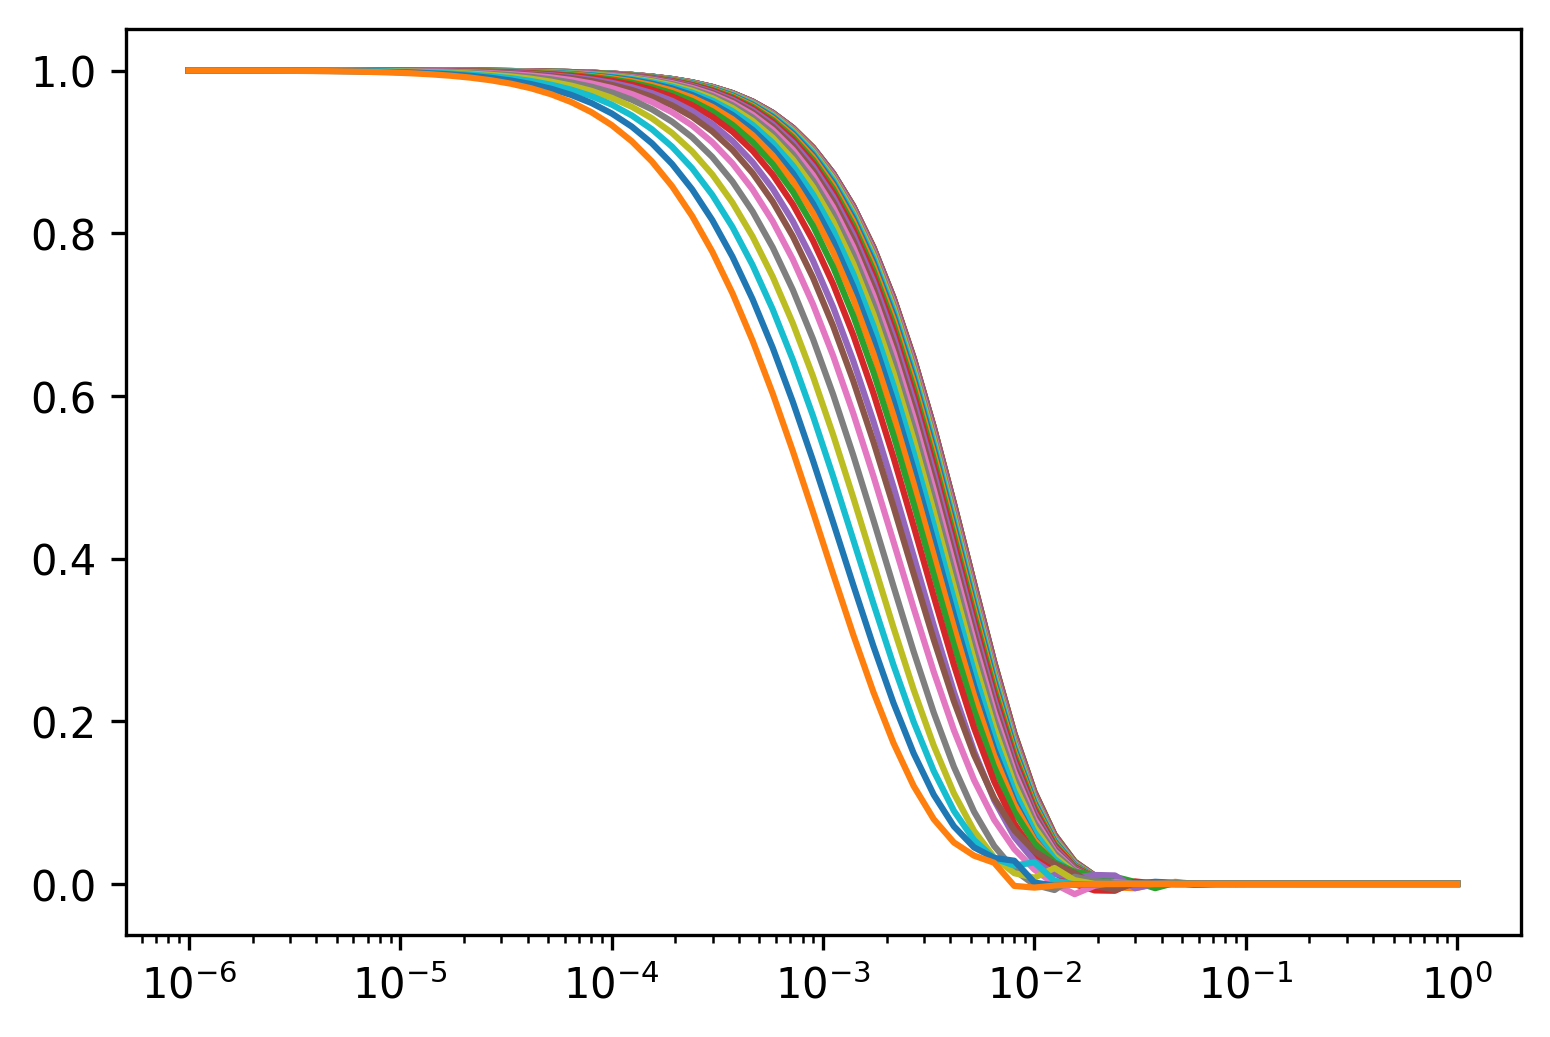

In [9]:
plt.figure(dpi = 300)
plt.plot(deltas, oup.T/np.max(oup, axis=-1), label = chibs)
plt.xscale('log')

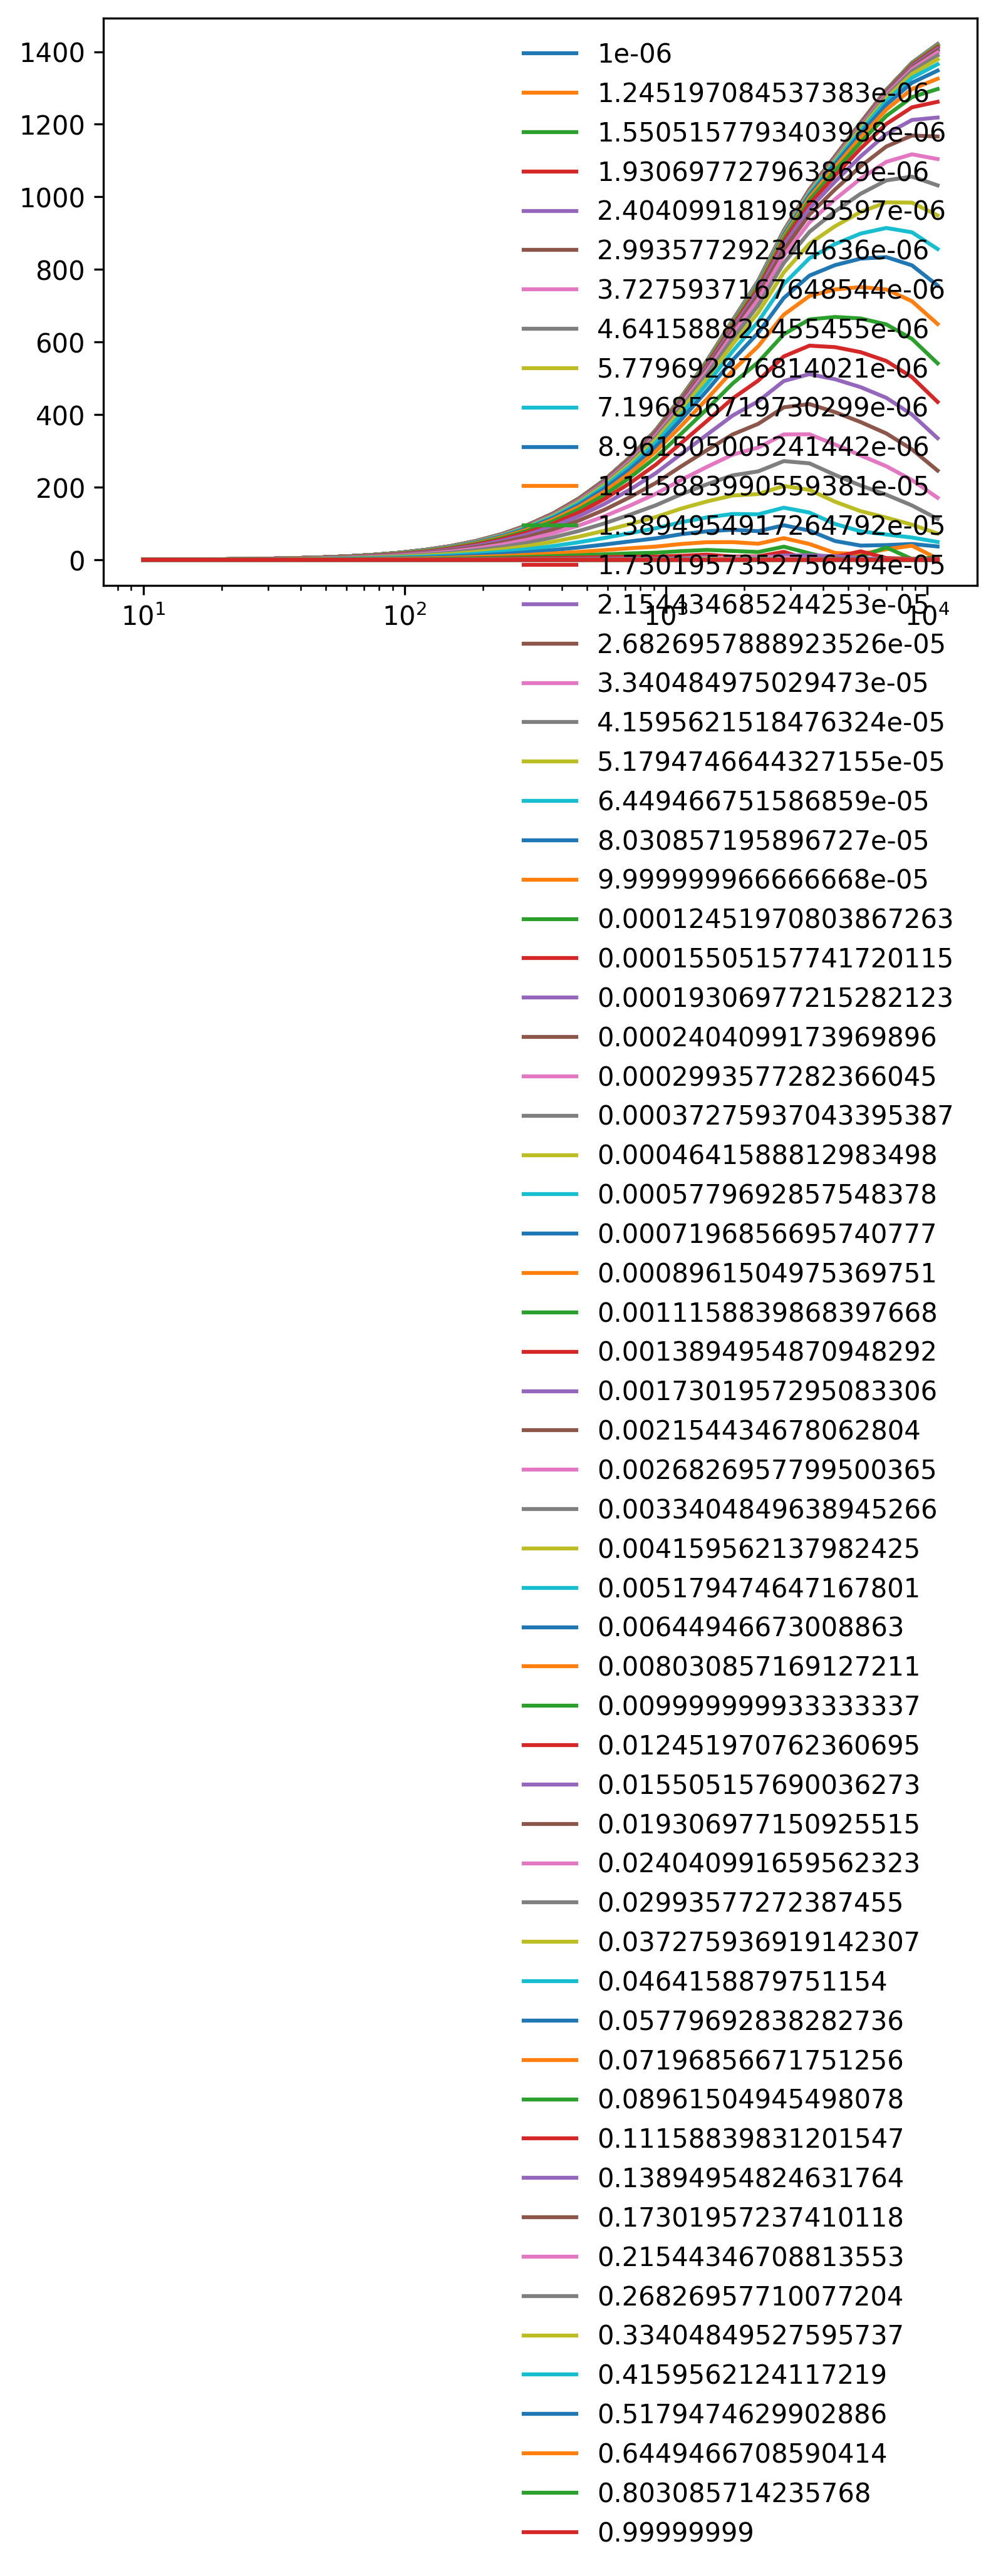

In [10]:
plt.figure(dpi = 300)
plt.plot(chibs, np.abs(oup[:,:]),label=deltas)
plt.xscale('log')
# plt.yscale('log')
plt.legend(frameon=False)